In [ ]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [ ]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout



In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# 데이터 불러오기

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


Train sample 수는 60,000장 shape은 28,28 RGB channel 이 흑백으로 1개

---
Test sample 수는 10,000장 shape 은 1 = label 하나

시간을 아끼기 위해 Train sample 20,000개, Test sample 1,000개 만 가지고 한다.

In [ ]:
from itertools import chain, repeat
import random

length=len(X_train)

np.random.seed(0)
p=list(repeat(1/length,length)) 

num_list=np.arange(length)
sample_index=np.random.choice(num_list,20000,replace=False,p=p) # dtype=ndarray
sample_index=sample_index.tolist() # dtype=list

X_train=X_train[sample_index]
y_train=y_train[sample_index]
print(len(X_train))

20000


In [ ]:
length=len(X_test)

np.random.seed(0)
p=list(repeat(1/length,length))

num_list=np.arange(length)
sample_index=np.random.choice(num_list,2000,replace=False,p=p) # dtype=ndarray
sample_index=sample_index.tolist() # dtype=list

X_test=X_test[sample_index]
y_test=y_test[sample_index]
print(len(X_test))

2000


#### 훈련 y_label  분포 확인

In [ ]:
unique_ylabel=[]

for y in y_train:
  if y not in unique_ylabel:
    unique_ylabel.append(y)

print(unique_ylabel)

[2, 1, 6, 4, 7, 8, 5, 9, 3, 0]


ylabel은 0-9까지 숫자임

In [ ]:
train_label_counts={}
for y in unique_ylabel:
  train_label_counts[y]=y_train.tolist().count(y)

print(sorted(train_label_counts.items()))

[(0, 2026), (1, 2227), (2, 1969), (3, 2024), (4, 2004), (5, 1779), (6, 1970), (7, 2050), (8, 1965), (9, 1986)]


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

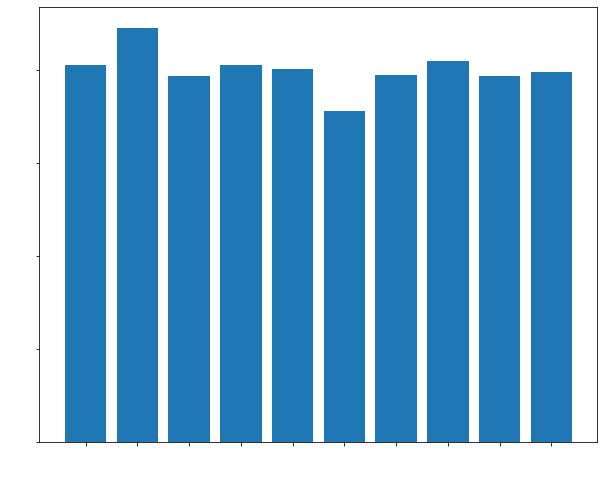

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(train_label_counts.keys(),train_label_counts.values())
plt.xticks(range(0,10),color='white')
plt.xlabel('# of Each Class',color='white',size=15)
plt.yticks(color='white')

클래스의 분포가 고르다고 볼 수 있음/ 1이 가장 많고 5가 가장 적음

#### 시험 y_label 분포 확인

In [ ]:
unique_ylabel=[]

for y in y_test:
  if y not in unique_ylabel:
    unique_ylabel.append(y)

print(unique_ylabel)

[5, 2, 4, 7, 8, 3, 9, 0, 1, 6]


ylabel은 0-9까지 숫자임

In [ ]:
test_label_counts={}
for y in unique_ylabel:
  test_label_counts[y]=y_test.tolist().count(y)

print(sorted(test_label_counts.items()))

[(0, 211), (1, 239), (2, 193), (3, 199), (4, 179), (5, 187), (6, 192), (7, 213), (8, 183), (9, 204)]


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

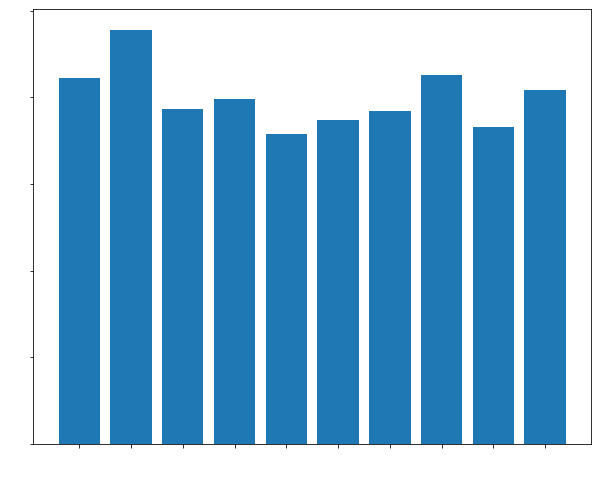

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(test_label_counts.keys(),test_label_counts.values())
plt.xticks(range(0,10),color='white')
plt.xlabel('# of Each Class',color='white',size=15)
plt.yticks(color='white')

마찬가지로 클래스의 분포가 고르다고 볼 수 있음/ 1이 가장 많고 5가 가장 적음

#### 데이터 Reshaping

In [ ]:
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [ ]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 생성

In [ ]:
def deep_cnn_advanced_nin():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3) 
                     ,strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    #padding=valid : 패딩이 없음 // customizing 할 수 있음
    # kerner size= stride = 1 => 결국 사이즈의 변화가 없다는 것
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model   

model = deep_cnn_advanced_nin()

history = model.fit(X_train, y_train, batch_size = 100, validation_split = 0.2,validation_batch_size=100, epochs = 15)


Epoch 1/15
160/160 [==============================] - 2s 14ms/step - loss: 1.0027 - accuracy: 0.6681 - val_loss: 1.3028 - val_accuracy: 0.7070
Epoch 2/15
160/160 [==============================] - 2s 12ms/step - loss: 0.3152 - accuracy: 0.9034 - val_loss: 0.2520 - val_accuracy: 0.9302
Epoch 3/15
160/160 [==============================] - 2s 12ms/step - loss: 0.1982 - accuracy: 0.9402 - val_loss: 0.1233 - val_accuracy: 0.9620
Epoch 4/15
160/160 [==============================] - 2s 12ms/step - loss: 0.1566 - accuracy: 0.9534 - val_loss: 0.1242 - val_accuracy: 0.9628
Epoch 5/15
160/160 [==============================] - 2s 12ms/step - loss: 0.1346 - accuracy: 0.9603 - val_loss: 0.0779 - val_accuracy: 0.9775
Epoch 6/15
160/160 [==============================] - 2s 12ms/step - loss: 0.1099 - accuracy: 0.9686 - val_loss: 0.0935 - val_accuracy: 0.9718
Epoch 7/15
160/160 [==============================] - 2s 12ms/step - loss: 0.0966 - accuracy: 0.9701 - val_loss: 0.2662 - val_accuracy: 0.9308

# 모델 성능확인

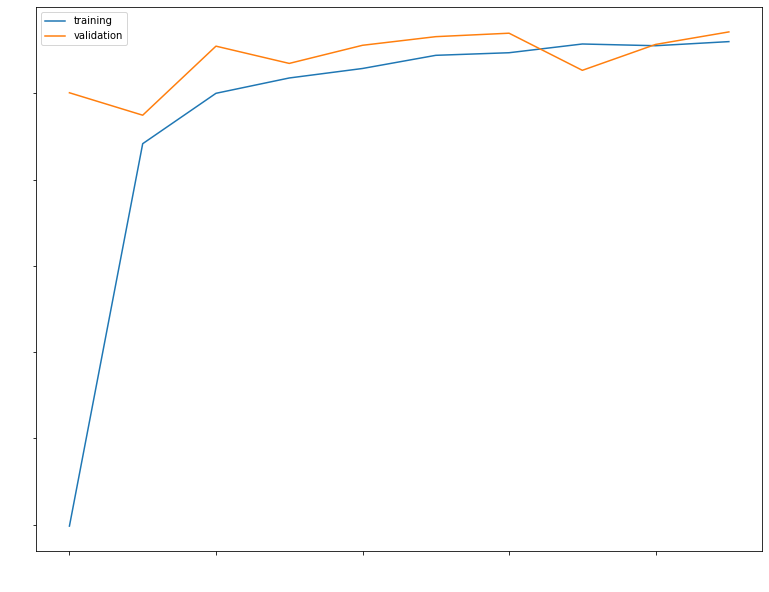

In [ ]:
plt.figure(figsize=(13,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(color='white')
plt.xlabel('epoch',size=13,color='white')
plt.yticks(color='white')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

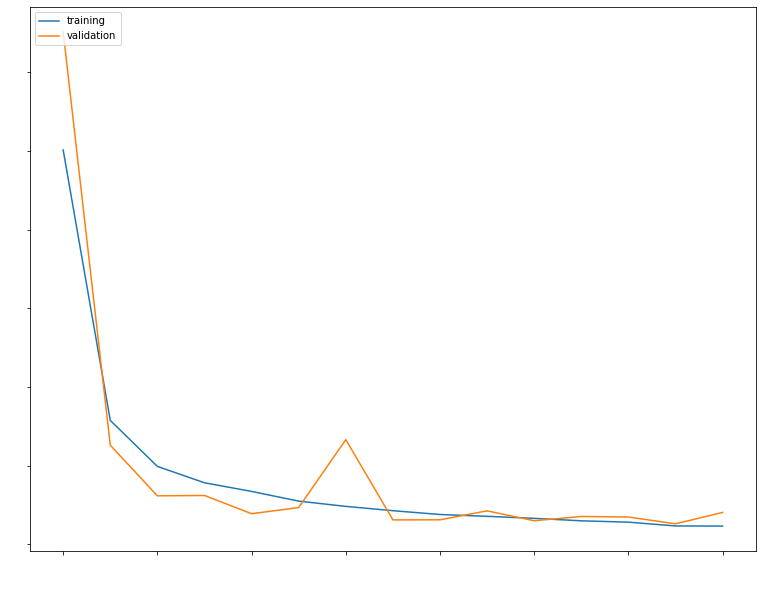

In [ ]:
plt.figure(figsize=(13,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(color='white')
plt.xlabel('epoch',size=13,color='white')
plt.yticks(color='white')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()